In [22]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import shutil
import cv2

In [23]:
# images are very large to reduce process time first resize all the images in the dataset 
# and store the resized dataset in the kaggle working directory/resized. Resizing first is
# faster than doing the resizing as part of the training loop where each image is resized for every epoch
sdir=r'/home/student/Desktop/Code/re_daaset/resized'
# working_dir=r'/home/student/Desktop/Code/re_daaset'
height=224 # set desired resized image height
width=224  # set desired resized image width
# dest_dir=os.path.join(working_dir, 'resized') # directory holding resized dataset
slist=os.listdir(sdir)
classes=[]
for klass in slist:
    classpath=os.path.join(sdir,klass)
    if os.path.isdir(classpath): # make sure it is a directory not a file
        classes.append(klass)
        

In [24]:
classes

['tomato__JAS_MIT',
 'eggplant__N_K',
 'ridge_gourd__N',
 'tomato__N',
 'cucumber__N',
 'tomato__LM',
 'bottle_gourd__JAS',
 'eggplant__EB',
 'bitter_gourd__JAS',
 'bitter_gourd__N',
 'eggplant__healthy',
 'bitter_gourd__DM',
 'eggplant__FB',
 'bottle_gourd__N',
 'tomato__healthy',
 'bottle_gourd__N_Mg',
 'eggplant__JAS',
 'tomato__MIT',
 'snake_gourd__N',
 'eggplant__MIT_EB',
 'snake_gourd__healthy',
 'bottle_gourd__JAS_MIT',
 'bottle_gourd__LS',
 'snake_gourd__N_K',
 'cucumber__healthy',
 'ash_gourd__N',
 'ash_gourd__K',
 'ridge_gourd__healthy',
 'ash_gourd__K_Mg',
 'bitter_gourd__N_Mg',
 'bitter_gourd__LS',
 'ridge_gourd__PLEI_MIT',
 'eggplant__N',
 'snake_gourd__LS',
 'ash_gourd__N_K',
 'bottle_gourd__N_K',
 'ridge_gourd__PLEI',
 'ridge_gourd__PC',
 'bottle_gourd__K',
 'bitter_gourd__K',
 'ridge_gourd__N_Mg',
 'bitter_gourd__K_Mg',
 'bottle_gourd__healthy',
 'ash_gourd__PM',
 'cucumber__N_K',
 'bottle_gourd__DM',
 'eggplant__MIT',
 'cucumber__K',
 'snake_gourd__K',
 'ash_gourd__hea

In [25]:
# Input the resized dataset make a list or filepaths and labels for each image file
working_dir=r'/home/student/Desktop/Code/re_daaset'
dest_dir=os.path.join(working_dir, 'resized')
limiter=150 # set a value for the maximum number of image files to use for any class
class_count=len(classes)# number of classes
fcount_list=[]
filepaths=[]# create empty list to hold path to image files
labels=[] # create empty list of labels associated with each file
for klass in classes: # iterate through the classes
    classpath=os.path.join(dest_dir,klass)
    if os.path.isdir(classpath):
        flist=sorted(os.listdir(classpath))# get list of files in each class    
        fcount=len(flist)
        if fcount > limiter: #if there are more files than the limiter value select limiter number of files
            flist=np.random.choice(flist, limiter, replace=False)
        fcount_list.append(len(flist)) # make a list of the number of files in each class    
        desc=f'{klass:30s}'
        for f in tqdm(flist, ncols=100, colour='blue', desc=desc, unit='files'): # iterate through the files in each class
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
zip_list=zip(fcount_list,classes)
ordered_list=sorted(zip_list) # order the list by the number of files
fc='File Count'
k='Class'
print(f'the dataset has {class_count} classes listed below:')
print(f'{fc:^12s}{k:^45s}')
for d in ordered_list:
    print(f'{str(d[0]):^12s}{d[1]:^45s}')
          

tomato__N_K                   : 100%|████████████████████████| 40/40 [00:00<00:00, 505337.83files/s]

the dataset has 57 classes listed below:
 File Count                     Class                    
     24                   bottle_gourd__JAS              
     25                 ridge_gourd__PLEI_MIT            
     28                   bottle_gourd__DM               
     28                   bottle_gourd__LS               
     29                 bottle_gourd__JAS_MIT            
     30                    bottle_gourd__K               
     31                 bottle_gourd__healthy            
     32                    tomato__JAS_MIT               
     33                    ridge_gourd__PC               
     33                    snake_gourd__LS               
     34                  bottle_gourd__N_Mg              
     34                   cucumber__healthy              
     34                     eggplant__JAS                
     34                   ridge_gourd__N_Mg              
     35                   bitter_gourd__JAS              
     35                   bitte

In [26]:
# make a dataframe with columns filepaths, labels
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print(f'the dataframe length is {len(df)}')

                                           filepaths           labels
0  /home/student/Desktop/Code/re_daaset/resized/t...  tomato__JAS_MIT
1  /home/student/Desktop/Code/re_daaset/resized/t...  tomato__JAS_MIT
2  /home/student/Desktop/Code/re_daaset/resized/t...  tomato__JAS_MIT
3  /home/student/Desktop/Code/re_daaset/resized/t...  tomato__JAS_MIT
4  /home/student/Desktop/Code/re_daaset/resized/t...  tomato__JAS_MIT
the dataframe length is 4088


In [27]:
# now df contains the full dataset and each class has limiter number of images for a balanced dataset
# lets partition the dataset into a train set, a test set and a validation set
from sklearn.model_selection import train_test_split
train_df, dummy_df=train_test_split(df, train_size=.8, shuffle=True, random_state=123, stratify=df['labels'])
valid_df, test_df=train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])
print(f'train_df length= {len(train_df)} test_df length= {len(test_df)} valid_df length= {len(valid_df)}')

train_df length= 3270 test_df length= 409 valid_df length= 409


In [28]:
# now create generators for the dataframes
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size=(224,224)
bs=40
gen=ImageDataGenerator()
train_gen=gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,seed=123,
                                       class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=bs)
valid_gen=gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,seed=123,
                                       class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=bs)
test_gen=gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,seed=123,
                                       class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=bs)

Found 3270 validated image filenames belonging to 57 classes.
Found 409 validated image filenames belonging to 57 classes.
Found 409 validated image filenames belonging to 57 classes.


In [29]:
# Now lets make the model. I will use transfer learning with EfficientNetB0
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
# Define a function that calculates the F1 metric
def F1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
img_shape=(224,224,3)
lr=.001
base_model=tf.keras.applications.EfficientNetV2B3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max')
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(class_count, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy', F1_score]) 

In [30]:
# we are now ready to train the model but first lets define some useful callbacks
#rlronp controls learning rate based on validation loss
#estop stops training if value loss fails to reduce after 4 consecutive epochs
rlronp=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.4,  patience=2, verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",  patience=4, verbose=1, restore_best_weights=True)
callbacks=[rlronp, estop] 
epochs=50
# Note: ignore warning training will proceed properly
history=model.fit(x=train_gen,   epochs=epochs, verbose=1, callbacks=callbacks,  validation_data=valid_gen,
                   validation_steps=None,  shuffle=True,  initial_epoch=0) # train the model

Epoch 1/50


2023-11-20 10:17:12.180590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


82/82 [==============================] - ETA: 0s - loss: 9.9569 - accuracy: 0.2997 - F1_score: 0.2298

2023-11-20 10:23:37.679625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


82/82 [==============================] - 395s 5s/step - loss: 9.9569 - accuracy: 0.2997 - F1_score: 0.2298 - val_loss: 8.4056 - val_accuracy: 0.4890 - val_F1_score: 0.4238 - lr: 0.0010
Epoch 2/50
82/82 [==============================] - 372s 5s/step - loss: 7.5995 - accuracy: 0.5107 - F1_score: 0.4241 - val_loss: 6.9270 - val_accuracy: 0.5208 - val_F1_score: 0.4547 - lr: 0.0010
Epoch 3/50
82/82 [==============================] - 371s 5s/step - loss: 6.2401 - accuracy: 0.6205 - F1_score: 0.5371 - val_loss: 5.9045 - val_accuracy: 0.6015 - val_F1_score: 0.5084 - lr: 0.0010
Epoch 4/50
82/82 [==============================] - 366s 4s/step - loss: 5.1958 - accuracy: 0.7086 - F1_score: 0.6335 - val_loss: 5.0805 - val_accuracy: 0.6088 - val_F1_score: 0.5668 - lr: 0.0010
Epoch 5/50
82/82 [==============================] - 372s 5s/step - loss: 4.3340 - accuracy: 0.7670 - F1_score: 0.7008 - val_loss: 4.4346 - val_accuracy: 0.6161 - val_F1_score: 0.5782 - lr: 0.0010
Epoch 6/50
82/82 [=============

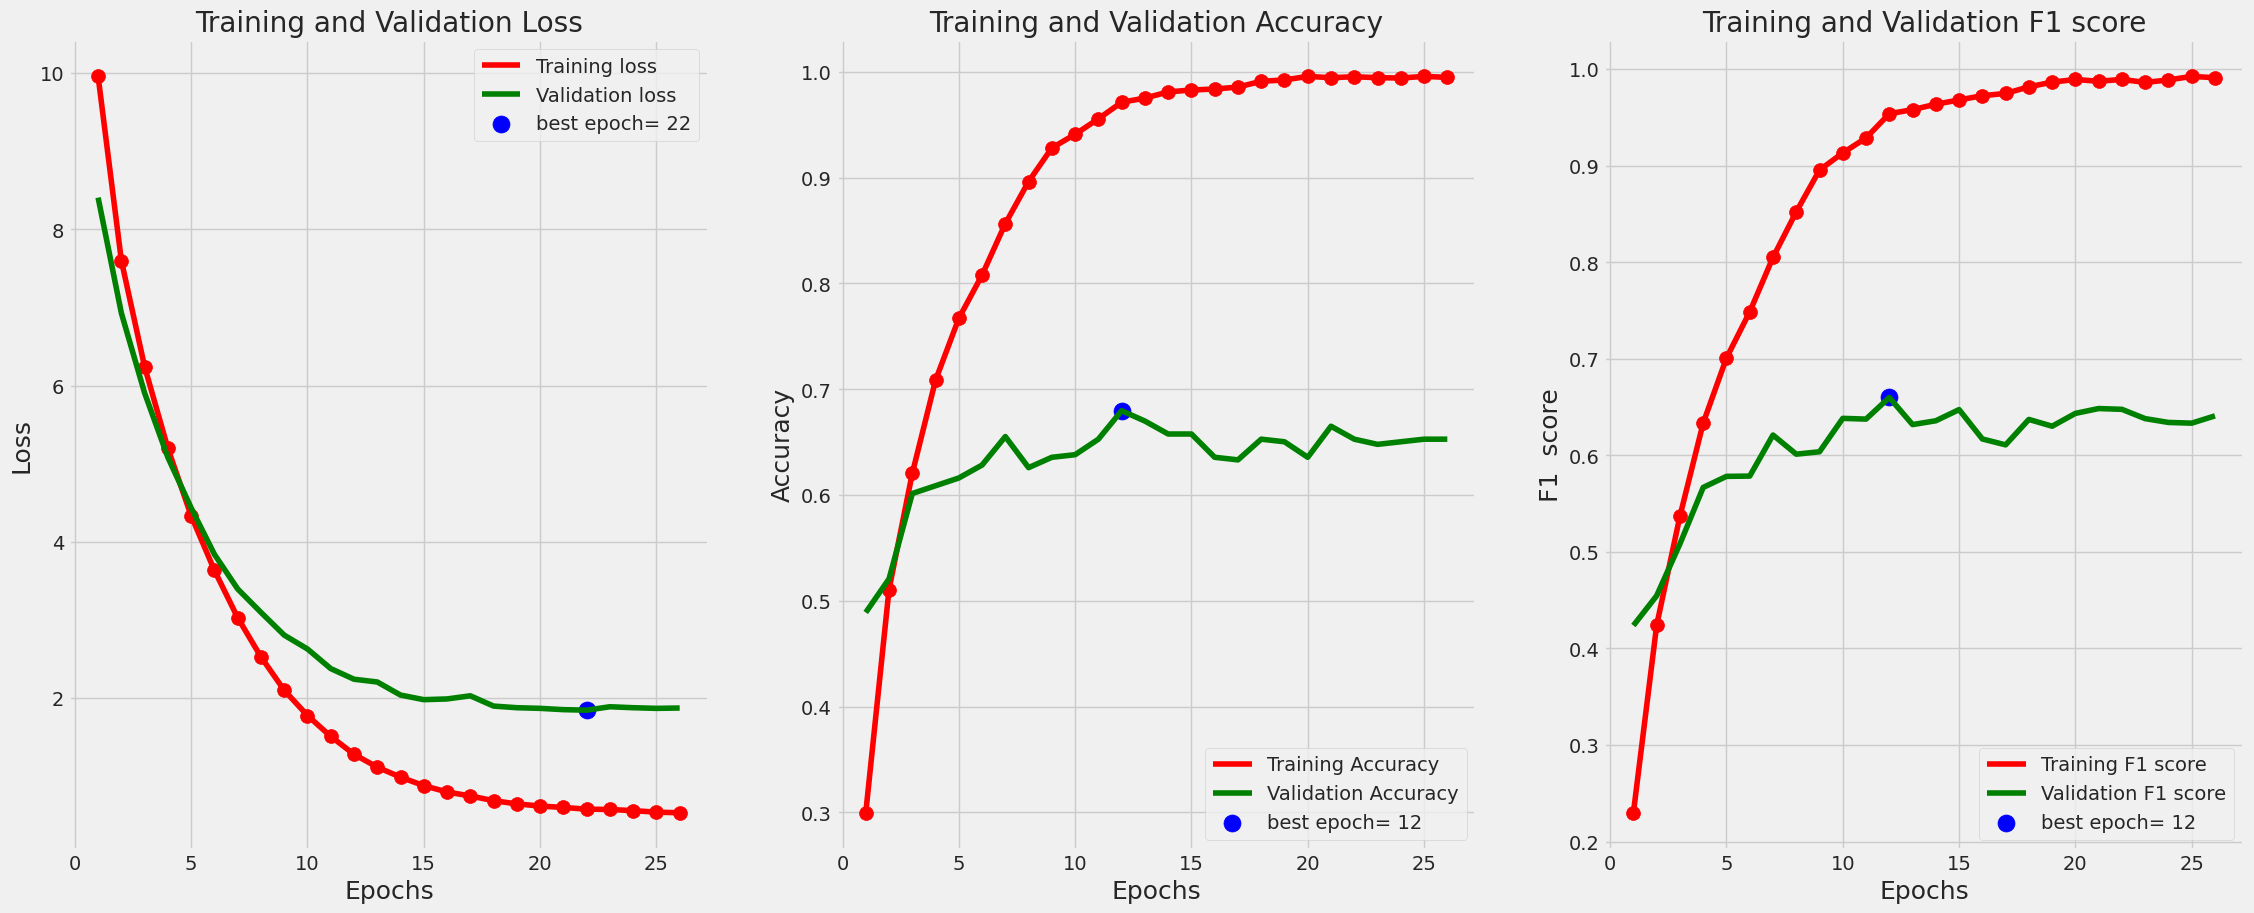

In [31]:
# lets define a function to plot the training data
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('darkgrid')
def tr_plot(tr_data):
    start_epoch=0
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    tf1=tr_data.history['F1_score']
    vf1=tr_data.history['val_F1_score']    
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    indexf1=np.argmax(vf1)
    vf1_highest=vf1[indexf1]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch) 
    f1_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(25,10))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].scatter(Epochs, tloss, s=100, c='red')    
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].scatter(Epochs, tacc, s=100, c='red')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()
    axes[2].plot (Epochs,tf1,'r',label= 'Training F1 score')    
    axes[2].plot (Epochs,vf1,'g',label= 'Validation F1 score')
    index_tf1=np.argmax(tf1)#  this is the epoch with the highest training F1 score
    tf1max=tf1[index_tf1]
    index_vf1=np.argmax(vf1)# thisiis the epoch with the highest validation F1 score
    vf1max=vf1[index_vf1]
    axes[2].scatter(index_vf1+1 +start_epoch,vf1max, s=150, c= 'blue', label=vc_label)    
    axes[2].scatter(Epochs, tf1, s=100, c='red')
    axes[2].set_title('Training and Validation F1 score')
    axes[2].set_xlabel('Epochs', fontsize=18)
    axes[2].set_ylabel('F1  score', fontsize=18)
    axes[2].legend()    
    plt.tight_layout    
    plt.show()
    return 

tr_plot(history) # plot the training data

2023-11-20 12:52:53.457802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 8s 615ms/step
There were 135 errors in 409 tests for an accuracy of  66.99 and an F1 score of  66.63


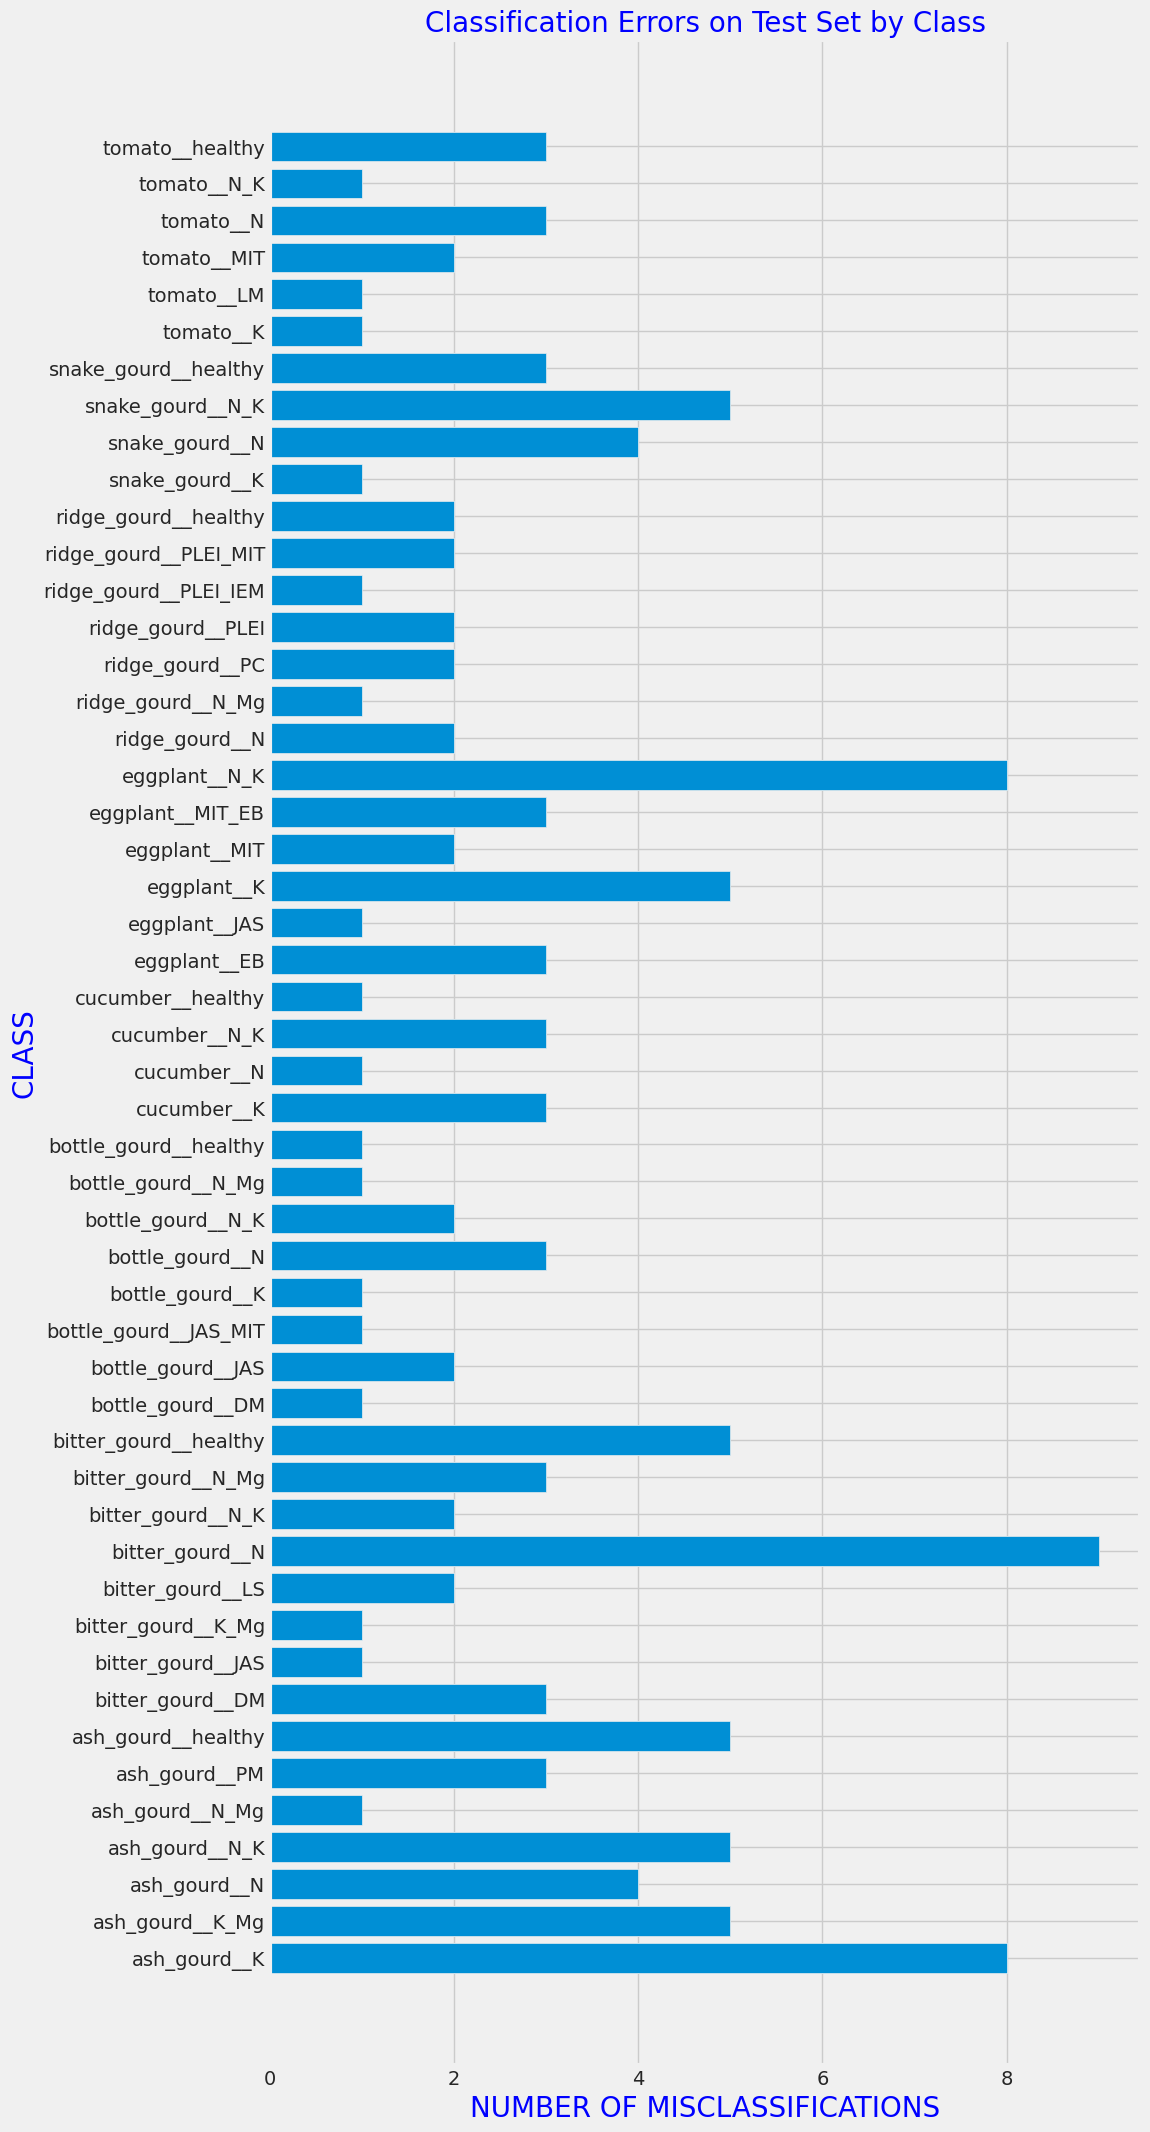

Classification Report:
----------------------
                        precision    recall  f1-score   support

         ash_gourd__K     0.5000    0.4667    0.4828        15
      ash_gourd__K_Mg     1.0000    0.1667    0.2857         6
         ash_gourd__N     0.5000    0.3333    0.4000         6
       ash_gourd__N_K     0.5000    0.6667    0.5714        15
      ash_gourd__N_Mg     0.4286    0.7500    0.5455         4
        ash_gourd__PM     0.7143    0.6250    0.6667         8
   ash_gourd__healthy     0.4444    0.4444    0.4444         9
     bitter_gourd__DM     1.0000    0.4000    0.5714         5
    bitter_gourd__JAS     1.0000    0.7500    0.8571         4
      bitter_gourd__K     1.0000    1.0000    1.0000         5
   bitter_gourd__K_Mg     1.0000    0.7500    0.8571         4
     bitter_gourd__LS     1.0000    0.3333    0.5000         3
      bitter_gourd__N     0.5455    0.4000    0.4615        15
    bitter_gourd__N_K     0.7857    0.8462    0.8148        13
   bitt

In [32]:
# lets define a function that does predictions on the test set and computes the confusion matrix 
# and a classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
def predictor(model,test_gen):
    classes=list(test_gen.class_indices.keys())
    class_count=len(classes)
    preds=model.predict(test_gen, verbose=1)
    errors=0
    test_count =len(preds)
    misclassified_classes=[]
    misclassified_files=[]
    misclassified_as = []
    pred_indices=[]
    for i, p in enumerate (preds):
        pred_index=np.argmax(p)
        pred_indices.append(pred_index)
        true_index= test_gen.labels[i]    
        if  pred_index != true_index:        
            errors +=1        
            misclassified_classes.append(classes[true_index])
            misclassified_as.append(classes[pred_index])
            file=test_gen.filenames[i]
            split=file.split('/')
            L=len(split)           
            f=split[L-2] +' '+ split[L-1]  
            misclassified_files.append(f)

    accuracy = (test_count-errors)*100/test_count
    ytrue=np.array(test_gen.labels)
    ypred=np.array(pred_indices)
    f1score=f1_score(ytrue, ypred, average='weighted')* 100
    msg=f'There were {errors} errors in {test_count} tests for an accuracy of {accuracy:6.2f} and an F1 score of {f1score:6.2f}'
    print (msg) 
    misclassified_classes=sorted(misclassified_classes)
    if len(misclassified_classes) > 0:
        misclassifications=[]
        for klass in misclassified_classes:
            mis_count=misclassified_classes.count(klass)
            misclassifications.append(mis_count)
        unique=len(np.unique(misclassified_classes)) 
        if unique==1:
            height=int(unique)
        else:
            height =int(unique/2)
        plt.figure(figsize=(10, height))
        plt.style.use('fivethirtyeight')
        plt.barh(misclassified_classes, misclassifications )
        plt.title( 'Classification Errors on Test Set by Class', fontsize=20, color='blue')
        plt.xlabel('NUMBER OF MISCLASSIFICATIONS', fontsize=20, color='blue')
        plt.ylabel('CLASS', fontsize=20, color='blue')
        plt.show()
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(ytrue, ypred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    return f1score, misclassified_files

f1score, misclassified_files= predictor(model,test_gen)# do predictions on the test set

In [33]:
# lets save the model with nomenclature subject,no of classes, image size, f1score
subject='olid'
name=f'{subject}-{str(len(classes))}-({str(img_size[0])} X {str(img_size[1])})- {f1score:5.2f}.h5'    
model_save_loc=os.path.join(working_dir, name)    
model.save(model_save_loc)        
print( f'model was saved as {model_save_loc}')


model was saved as /home/student/Desktop/Code/re_daaset/olid-57-(224 X 224)- 66.63.h5


: 